# Distributions
細かい定義は置いておいて，気になった分布の性質を調べる

In [1]:
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

np.random.seed(0)

## F分布

様々な自由度を持つF分布の理論分布を書いてみる

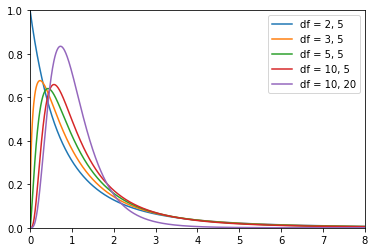

In [2]:
X = np.linspace(0.000001, 8, 1000)

dfs = ([2,5], [3,5], [5,5], [10,5], [10,20])

for df1,df2 in dfs:
    Y = stats.f.pdf(X, df1, df2)
    plt.plot(X, Y, label='df = '+str(df1)+', '+str(df2))

plt.legend()
plt.xlim(0, 8)
plt.ylim(0, 1.0)
plt.show()

2つの正規分布N(mu1,std1), N(mu2,std2)からそれぞれn1, n2個サンプルを抽出し，
それぞれのサンプル集団から求めた不偏分散s1^2, s2^2を考える  
この時，これらの不偏分散の比は自由度df=(n1-1, n2-1)のF分布に従う  
これを確かめる

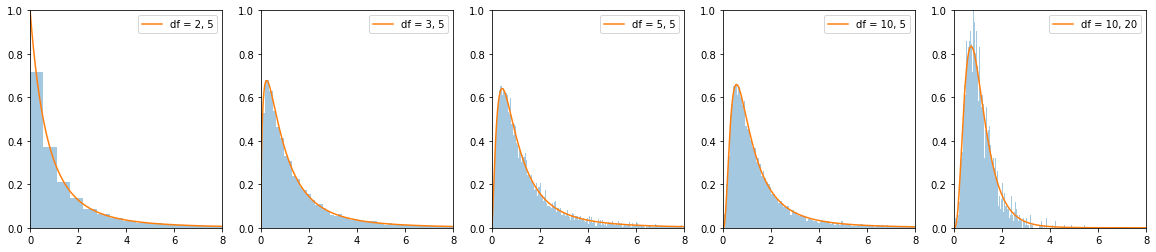

In [3]:
N = 10000
X = np.linspace(0.000001, 8, 1000) # for theoretical dist
dfs = ([2,5], [3,5], [5,5], [10,5], [10,20])

fig, axs = plt.subplots(nrows=1, ncols=len(dfs), figsize=(20,4))


std1, std2 = 5, 5 # keep std1/std2=1
mu1, mu2 = 0, 0 # these don't affect the shape of distribution, but keep same

for i,(df1,df2) in enumerate(dfs):
    # unpack df and set n
    n1 = df1+1
    n2 = df2+1
    # Pick n sample from normdist with N chain
    X1 = stats.norm.rvs(loc=mu1, scale=std1, size=(n1,N))
    X2 = stats.norm.rvs(loc=mu2, scale=std2, size=(n2,N))
    # Calc unbiased std for both samples (N chains)
    uvar1 = X1.var(ddof=1, axis=0)
    uvar2 = X2.var(ddof=1, axis=0)
    # Calc ratio btw uvar1 and uvar2 (fstat) for each chain
    fstat = uvar1/uvar2
    # Calc theoretical dist
    Y = stats.f.pdf(X, df1, df2)
    # Display
    sns.distplot(fstat, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[i])
    lm=sns.lineplot(X,Y, label='df = '+str(df1)+', '+str(df2), ax=axs[i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(0,8)
    axes.set_ylim(0,1)

## t分布

様々な自由度を持つt分布を正規分布と一緒に書いてみる  
自由度が大きくなるにつれ正規分布に近づく

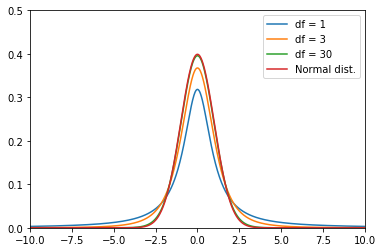

In [4]:
X = np.linspace(-10, 10, 1000)

dfs = (1,3,30)

for df in dfs:
    Y = stats.t.pdf(X, df=df)
    sns.lineplot(X, Y, label='df = '+str(df))

Y = stats.norm.pdf(X)
sns.lineplot(X, Y, label='Normal dist.')
plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.show()

平均mu, 分散varの確率分布からnサンプル抽出する．この時，nサンプルの平均値は中心極限定理によりN(mu, var/n)に従う  
ここで  
z = (サンプル平均-mu) / sqrt(var/n)  
という標準化を行うことで，zは標準正規分布に従う  
しかし，母分布の分散varの代わりにサンプルから計算した不偏分散uを用いて  
t = (サンプル平均-mu) / sqrt(u/n)  
として標準化を行うと，tが従う分布は自由度n-1のt分布(mu=0,std=1)になる．これを確認する．

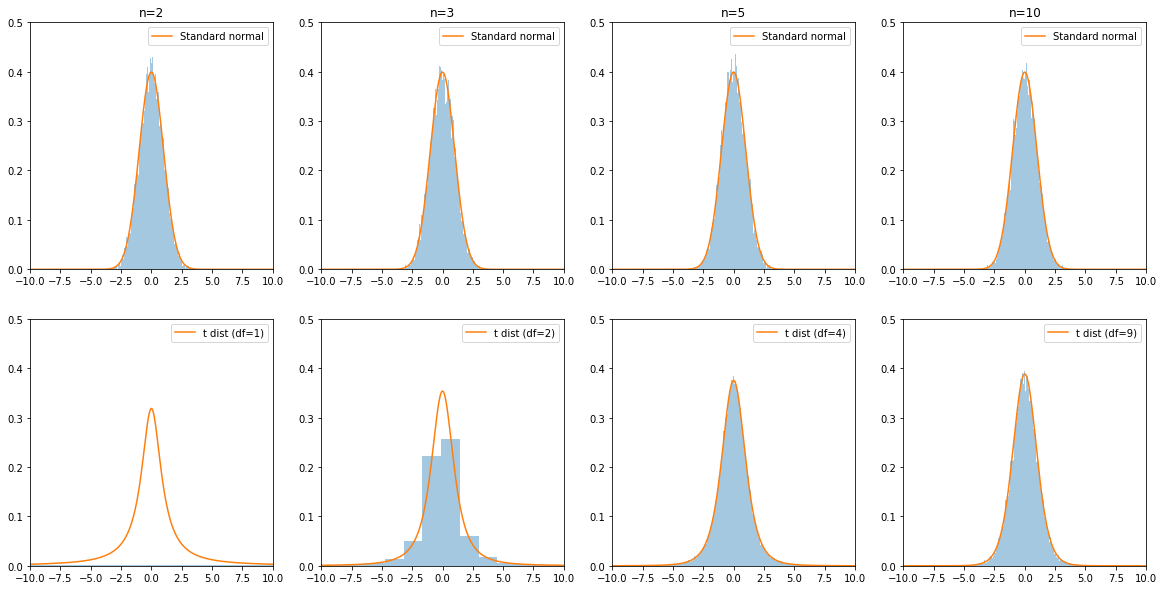

In [5]:
N = 100000 # repeat n samples N times
# Define population distribution
mu, std = 0, 5
frozen_population = stats.norm(loc=mu, scale=std)

ns = (2,3,5,10)
fig, axs = plt.subplots(nrows=2, ncols=len(ns), figsize=(len(ns)*5,10))

for i,(n) in enumerate(ns):
    # Pick n samples (*Ntimes) from population dist
    samples = frozen_population.rvs(size=(n,N))
    # Calc mean and unbiased std of n samples (*Ntimes)
    mu_samples = samples.mean(axis=0)
    std_samples = samples.std(axis=0, ddof=1) # unbiased std
    # Standardize using true std (results belong to standard normal)
    z = (mu_samples-mu) / (std/np.sqrt(n))
    # Standardize using unbiased std calculated from samples (results belong to t with df=n-1)
    t = (mu_samples-mu) / (std_samples/np.sqrt(n))
    
    # Theoretical distributions
    X = np.linspace(-10, 10, 1000) 
    Yn = stats.norm.pdf(X) # standard normal
    Yt = stats.t.pdf(X, df=n-1) # standard t (df=n-1)
    
    # Display histgram of z and t with theoretical distribution
    sns.distplot(z, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[0,i]).set(title='n='+str(n))
    lm=sns.lineplot(X,Yn, label='Standard normal', ax=axs[0,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)
    
    sns.distplot(t, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[1,i])
    lm=sns.lineplot(X,Yt, label='t dist (df='+str(n-1)+')', ax=axs[1,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)
    

上の4つは母分散で標準化した結果だが，サンプル数nに関係なく標準正規分布に従っている  
一方下4つは不偏分散で標準化したため，自由度がn-1のt分布に従っている  
左下n=2の場合は理論分布よりもヒストグラムのばらつきがとても大きい(裾が重く，多くがplot範囲外)  
なお，n=3の場合にbin幅が大きくみえるのは，plot範囲外の裾の方にも多くのbinが分布しているためだと思われる(bin数は固定している)

上記の母分布のパラメータを変えたり，母分布を正規分布以外にしても同様の傾向が確認できるはず  
母分布をF分布にしてみる

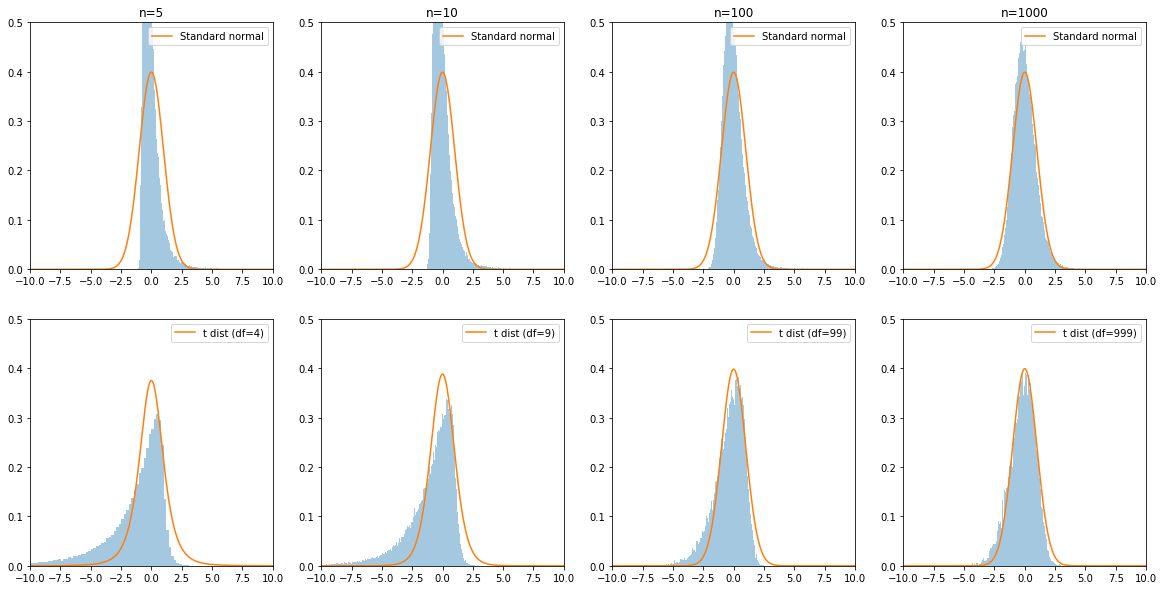

In [6]:
N = 100000 # repeat n samples N times
# Define population distribution
frozen_population = stats.f(3, 5)
# Extract moments
mu, var = frozen_population.stats(moments='mv')
std = np.sqrt(var)

ns = (5,10,100,1000)
fig, axs = plt.subplots(nrows=2, ncols=len(ns), figsize=(len(ns)*5,10))

for i,(n) in enumerate(ns):
    # Pick n samples (*Ntimes) from population dist
    samples = frozen_population.rvs(size=(n,N))
    # Calc mean and unbiased std of n samples (*Ntimes)
    mu_samples = samples.mean(axis=0)
    std_samples = samples.std(axis=0, ddof=1) # unbiased std
    # Standardize using true std (results belong to standard normal)
    z = (mu_samples-mu) / (std/np.sqrt(n))
    # Standardize using unbiased std calculated from samples (results belong to t with df=n-1)
    t = (mu_samples-mu) / (std_samples/np.sqrt(n))
    
    # Theoretical distributions
    X = np.linspace(-10, 10, 1000) 
    Yn = stats.norm.pdf(X) # standard normal
    Yt = stats.t.pdf(X, df=n-1) # standard t (df=n-1)
    
    # Display histgram of z and t with theoretical distribution
    sns.distplot(z, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[0,i]).set(title='n='+str(n))
    lm=sns.lineplot(X,Yn, label='Standard normal', ax=axs[0,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)
    
    sns.distplot(t, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[1,i])
    lm=sns.lineplot(X,Yt, label='t dist (df='+str(n-1)+')', ax=axs[1,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)

nが正規分布と違うことに注意  
自由度(3,5)のF分布では分布の偏りが大きいからか，サンプル平均が正規分布に収束するために必要なサンプル数が多い様子  
もう少し偏りがマイルドなbeta分布でも確かめてみる

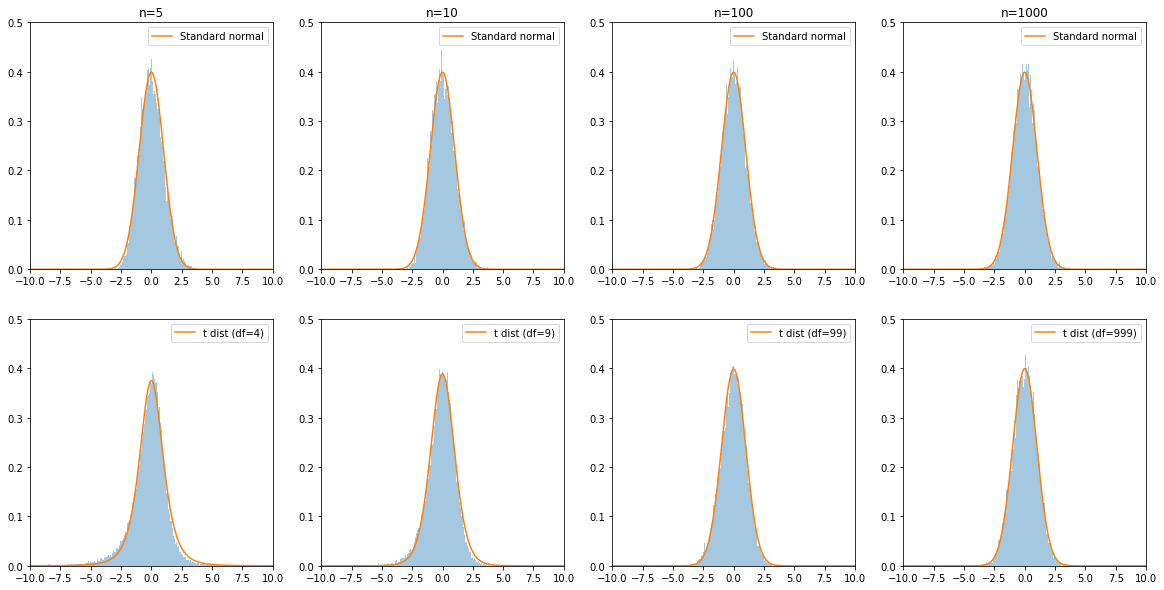

In [7]:
N = 100000 # repeat n samples N times
# Define population distribution
frozen_population = stats.beta(2, 5)
# Extract moments
mu, var = frozen_population.stats(moments='mv')
std = np.sqrt(var)

ns = (5,10,100,1000)
fig, axs = plt.subplots(nrows=2, ncols=len(ns), figsize=(len(ns)*5,10))

for i,(n) in enumerate(ns):
    # Pick n samples (*Ntimes) from population dist
    samples = frozen_population.rvs(size=(n,N))
    # Calc mean and unbiased std of n samples (*Ntimes)
    mu_samples = samples.mean(axis=0)
    std_samples = samples.std(axis=0, ddof=1) # unbiased std
    # Standardize using true std (results belong to standard normal)
    z = (mu_samples-mu) / (std/np.sqrt(n))
    # Standardize using unbiased std calculated from samples (results belong to t with df=n-1)
    t = (mu_samples-mu) / (std_samples/np.sqrt(n))
    
    # Theoretical distributions
    X = np.linspace(-10, 10, 1000) 
    Yn = stats.norm.pdf(X) # standard normal
    Yt = stats.t.pdf(X, df=n-1) # standard t (df=n-1)
    
    # Display histgram of z and t with theoretical distribution
    sns.distplot(z, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[0,i]).set(title='n='+str(n))
    lm=sns.lineplot(X,Yn, label='Standard normal', ax=axs[0,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)
    
    sns.distplot(t, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[1,i])
    lm=sns.lineplot(X,Yt, label='t dist (df='+str(n-1)+')', ax=axs[1,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)

f分布よりも正規分布への収束がかなり速い  
uniform分布でもみてみる

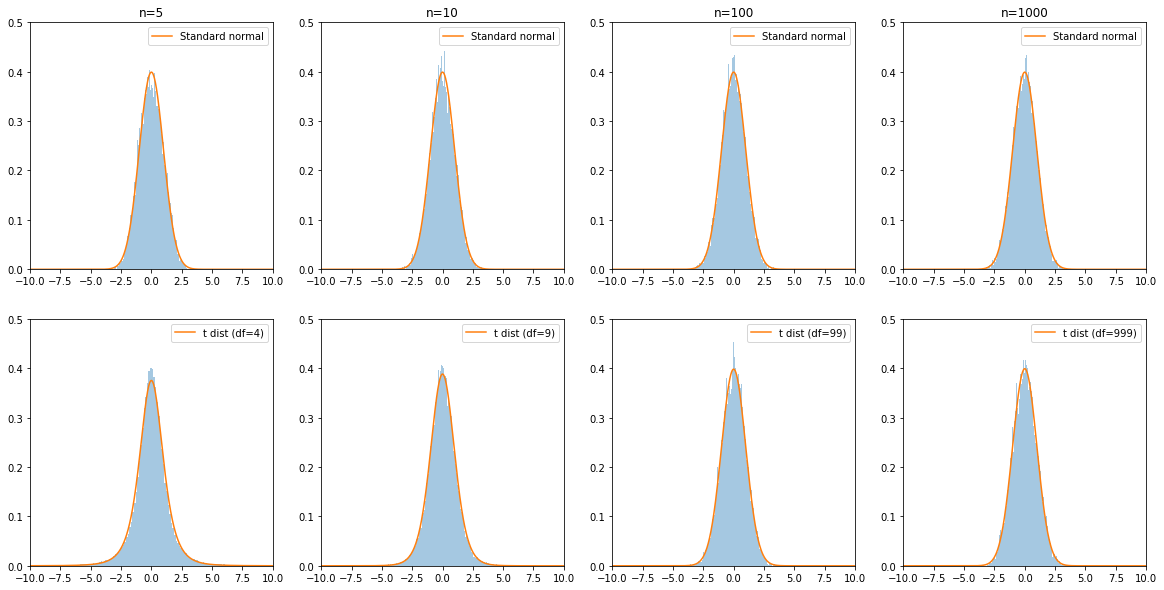

In [8]:
N = 100000 # repeat n samples N times
# Define population distribution
frozen_population = stats.uniform(1, 10)
# Extract moments
mu, var = frozen_population.stats(moments='mv')
std = np.sqrt(var)

ns = (5,10,100,1000)
fig, axs = plt.subplots(nrows=2, ncols=len(ns), figsize=(len(ns)*5,10))

for i,(n) in enumerate(ns):
    # Pick n samples (*Ntimes) from population dist
    samples = frozen_population.rvs(size=(n,N))
    # Calc mean and unbiased std of n samples (*Ntimes)
    mu_samples = samples.mean(axis=0)
    std_samples = samples.std(axis=0, ddof=1) # unbiased std
    # Standardize using true std (results belong to standard normal)
    z = (mu_samples-mu) / (std/np.sqrt(n))
    # Standardize using unbiased std calculated from samples (results belong to t with df=n-1)
    t = (mu_samples-mu) / (std_samples/np.sqrt(n))
    
    # Theoretical distributions
    X = np.linspace(-10, 10, 1000) 
    Yn = stats.norm.pdf(X) # standard normal
    Yt = stats.t.pdf(X, df=n-1) # standard t (df=n-1)
    
    # Display histgram of z and t with theoretical distribution
    sns.distplot(z, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[0,i]).set(title='n='+str(n))
    lm=sns.lineplot(X,Yn, label='Standard normal', ax=axs[0,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)
    
    sns.distplot(t, bins=1000, norm_hist=True, kde=False, rug=False, ax=axs[1,i])
    lm=sns.lineplot(X,Yt, label='t dist (df='+str(n-1)+')', ax=axs[1,i])
    axes = lm.axes # get axes of a subplot
    axes.set_xlim(-10,10)
    axes.set_ylim(0,0.5)

uniformはbetaよりもさらに速い  
したがって，正規分布への収束の速さには，分布の広がり(尖度)よりも偏り(歪度)が大きく関係していると思われる  
例えば多峰分布の方が偏りが極端にある分布よりも収束は速そう